In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn import svm
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [8]:
data = pd.read_csv(r"C:\Users\nshetty9\Downloads\BMI555IEE520Fall2018traintest.csv",)

FileNotFoundError: File b'C:\\Users\\nshetty9\\Downloads\\BMI555IEE520Fall2018traintest.csv' does not exist

In [9]:
data

NameError: name 'data' is not defined

In [4]:
data.isnull().sum()

Row    0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
      ..
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
x61    0
x62    0
x63    0
x64    0
x65    0
x66    0
y      0
dtype: int64

In [5]:
data.dtypes

Row      int64
x1       int64
x2       int64
x3       int64
x4       int64
x5      object
x6       int64
x7       int64
x8       int64
x9       int64
x10    float64
x11    float64
x12    float64
x13     object
x14      int64
x15      int64
x16      int64
x17      int64
x18      int64
x19      int64
x20      int64
x21      int64
x22      int64
x23      int64
x24      int64
x25      int64
x26      int64
x27      int64
x28      int64
x29      int64
        ...   
x38      int64
x39      int64
x40      int64
x41      int64
x42      int64
x43      int64
x44      int64
x45      int64
x46      int64
x47      int64
x48      int64
x49      int64
x50      int64
x51      int64
x52      int64
x53      int64
x54      int64
x55      int64
x56      int64
x57      int64
x58      int64
x59      int64
x60      int64
x61      int64
x62      int64
x63      int64
x64     object
x65     object
x66      int64
y        int64
dtype: object

In [6]:
mydata=pd.get_dummies(data, columns=["x5","x13", "x64","x65"], prefix=["x5","x13", "x64","x65"])

In [7]:
mydata

,Row,x1,x2,x3,x4,x6,x7,x8,x9,x10,...,x13_beta,x13_chi,x64_Ma,x64_Mk,x64_Mm,x64_Mp,x65_NPT,x65_NST,x65_PT,x65_ST
0,1,27,1,1,1,18,3,1,28,119.9,...,1,0,0,0,0,1,1,0,0,0
1,2,30,0,1,1,18,13,3,19,86.7,...,0,1,0,0,1,0,0,1,0,0
2,3,37,0,1,1,1,3,14,33,174.0,...,1,0,0,0,0,1,1,0,0,0
3,4,29,0,1,1,14,9,3,29,8.8,...,0,1,0,0,0,1,0,1,0,0
4,5,33,1,1,0,2,15,12,39,55.0,...,1,0,0,0,1,0,0,1,0,0
5,6,33,0,0,1,5,5,12,26,144.7,...,1,0,0,0,0,1,1,0,0,0
6,7,29,1,0,1,16,1,2,24,48.5,...,0,1,0,0,0,1,0,0,1,0
7,8,27,1,1,1,13,4,17,34,4.9,...,1,0,0,0,0,1,1,0,0,0
8,9,28,1,1,1,0,0,2,40,121.3,...,1,0,0,0,0,1,1,0,0,0
9,10,27,0,1,0,8,18,18,26,69.1,...,0,0,0,1,0,0,0,0,1,0


In [8]:
mydata=mydata.drop('Row',1)

In [9]:
mydata

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,x13_beta,x13_chi,x64_Ma,x64_Mk,x64_Mm,x64_Mp,x65_NPT,x65_NST,x65_PT,x65_ST
0,27,1,1,1,18,3,1,28,119.9,154.0,...,1,0,0,0,0,1,1,0,0,0
1,30,0,1,1,18,13,3,19,86.7,132.9,...,0,1,0,0,1,0,0,1,0,0
2,37,0,1,1,1,3,14,33,174.0,128.1,...,1,0,0,0,0,1,1,0,0,0
3,29,0,1,1,14,9,3,29,8.8,126.8,...,0,1,0,0,0,1,0,1,0,0
4,33,1,1,0,2,15,12,39,55.0,187.6,...,1,0,0,0,1,0,0,1,0,0
5,33,0,0,1,5,5,12,26,144.7,150.9,...,1,0,0,0,0,1,1,0,0,0
6,29,1,0,1,16,1,2,24,48.5,16.6,...,0,1,0,0,0,1,0,0,1,0
7,27,1,1,1,13,4,17,34,4.9,172.3,...,1,0,0,0,0,1,1,0,0,0
8,28,1,1,1,0,0,2,40,121.3,90.0,...,1,0,0,0,0,1,1,0,0,0
9,27,0,1,0,8,18,18,26,69.1,171.2,...,0,0,0,1,0,0,0,0,1,0


In [10]:
correlations=mydata.corr()
correlations

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,x13_beta,x13_chi,x64_Ma,x64_Mk,x64_Mm,x64_Mp,x65_NPT,x65_NST,x65_PT,x65_ST
x1,1.000000,0.013890,-0.005993,-0.044770,-0.019860,-0.018735,-0.012236,-0.023620,-0.002755,-0.019889,...,0.016211,-0.006475,0.005167,-0.021076,-0.013979,0.015744,-0.011188,0.013968,-0.016078,0.019815
x2,0.013890,1.000000,0.038318,-0.005410,0.002453,0.006499,-0.017949,-0.001571,0.018375,-0.006776,...,0.008407,-0.029239,-0.029884,-0.016711,-0.007551,0.035123,0.018719,0.012899,-0.028283,-0.014653
x3,-0.005993,0.038318,1.000000,-0.030188,0.008693,-0.013546,0.018638,0.005228,0.001218,-0.015136,...,-0.008219,0.018640,0.016572,-0.005810,0.004539,-0.013561,-0.011365,0.017878,-0.005274,0.001352
x4,-0.044770,-0.005410,-0.030188,1.000000,-0.000130,-0.024579,-0.012818,0.005377,0.014459,0.008752,...,0.033008,-0.039258,-0.005446,-0.003698,-0.003340,0.008207,0.028843,0.000495,-0.025398,-0.018454
x6,-0.019860,0.002453,0.008693,-0.000130,1.000000,0.018958,-0.014839,-0.020453,0.029220,0.014491,...,0.023974,-0.006180,-0.023528,0.004590,-0.043356,0.049673,0.070093,-0.049539,-0.010926,-0.038006
x7,-0.018735,0.006499,-0.013546,-0.024579,0.018958,1.000000,0.028646,0.026469,0.012254,-0.017366,...,-0.004247,-0.026501,0.016932,0.008822,0.039234,-0.047020,-0.016395,0.005960,0.039558,-0.029224
x8,-0.012236,-0.017949,0.018638,-0.012818,-0.014839,0.028646,1.000000,-0.028713,-0.044458,-0.003629,...,-0.006244,-0.008262,0.027390,0.001842,-0.026271,-0.000655,-0.009978,-0.006398,0.023257,-0.002983
x9,-0.023620,-0.001571,0.005228,0.005377,-0.020453,0.026469,-0.028713,1.000000,-0.041406,0.016104,...,0.028340,-0.033237,-0.007197,0.003398,-0.011700,0.013152,0.018778,0.019927,-0.032791,-0.018834
x10,-0.002755,0.018375,0.001218,0.014459,0.029220,0.012254,-0.044458,-0.041406,1.000000,-0.029290,...,0.013350,0.012779,0.003056,-0.019983,-0.029732,0.029214,0.019565,-0.011098,-0.029106,0.017927
x11,-0.019889,-0.006776,-0.015136,0.008752,0.014491,-0.017366,-0.003629,0.016104,-0.029290,1.000000,...,0.001886,-0.008120,0.022544,0.007552,-0.015043,-0.008173,-0.018290,0.029658,-0.016663,0.011089


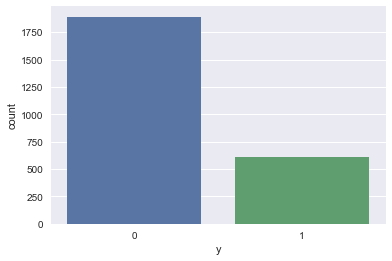

In [11]:
sns.countplot("y",data=mydata)

In [12]:
Y=mydata.iloc[:,62]

In [13]:
Y

0       0
1       0
2       1
3       0
4       0
5       1
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      1
28      1
29      1
       ..
2470    0
2471    0
2472    0
2473    0
2474    0
2475    1
2476    0
2477    1
2478    0
2479    0
2480    0
2481    0
2482    1
2483    0
2484    0
2485    0
2486    0
2487    0
2488    0
2489    1
2490    0
2491    1
2492    0
2493    0
2494    0
2495    1
2496    0
2497    0
2498    1
2499    0
Name: y, dtype: int64

In [14]:
X=mydata.iloc[:,0:80]

In [15]:
X=X.drop('y',1)
X.dtypes

x1             int64
x2             int64
x3             int64
x4             int64
x6             int64
x7             int64
x8             int64
x9             int64
x10          float64
x11          float64
x12          float64
x14            int64
x15            int64
x16            int64
x17            int64
x18            int64
x19            int64
x20            int64
x21            int64
x22            int64
x23            int64
x24            int64
x25            int64
x26            int64
x27            int64
x28            int64
x29            int64
x30            int64
x31            int64
x32            int64
              ...   
x51            int64
x52            int64
x53            int64
x54            int64
x55            int64
x56            int64
x57            int64
x58            int64
x59            int64
x60            int64
x61            int64
x62            int64
x63            int64
x66            int64
x5_A           uint8
x5_B           uint8
x5_C         

In [16]:
X.shape

(2500, 78)

In [17]:
scaler=StandardScaler()
scaler.fit(X)
Xstd=scaler.transform(X)

In [18]:
Xstd.shape

(2500, 78)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, Y, random_state=42)


In [20]:
def evaluate_model_auc(model, X_test_parameter, y_test_parameter):
    ## The predictions
    y_pred = model.predict(X_test_parameter)
    ## False positive rate, true positive rate and treshold
    fp_rate, tp_rate, treshold = roc_curve(y_test_parameter, y_pred)
    ## Calculate the auc score
    auc_score = auc(fp_rate, tp_rate)
    ## Returns the score to the model
    return (auc_score)


In [21]:
def plot_auc(model, X_test, y_test):
    ## Predictions
    y_pred = model.predict(X_test)
    
    ## Calculates auc score
    fp_rate, tp_rate, treshold = roc_curve(y_test, y_pred)
    auc_score = auc(fp_rate, tp_rate)
    
    ## Creates a new figure and adds its parameters
    plt.figure()
    plt.title('ROC Curve')
    ## Plot the data - false positive rate and true positive rate
    plt.plot(fp_rate, tp_rate, 'b', label = 'AUC = %0.2f' % auc_score)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


In [22]:
def evaluate_model_score(model, X_test, y_test):
    ## Return the score value to the model
    return model.score(X_test, y_test)


In [23]:
def evaluate_classification_report(model, y_test):
    return classification_report(y_test, model.predict(X_test), target_names=['Positive',
                                                                      'Negative'])


In [24]:
## This utility function evaluates a model using some common metrics such as accurary and auc. Also, it
## prints out the classification report for the specific model

def evaluate_model(model_param, X_test_param, y_test_param):
    print("Model evaluation")
    print("Accuracy: {:.5f}".format(evaluate_model_score(model_param, X_test_param, y_test_param)))
    print("AUC: {:.5f}".format(evaluate_model_auc(model_param, X_test_param, y_test_param)))
    print("\n#### Classification Report ####\n")
    print(evaluate_classification_report(model_param, y_test_param))
    plot_auc(model_param, X_test_param, y_test_param)

In [25]:
def gridsearch_results(gridsearch_model):
    print('Best score: {} '.format(gridsearch_model.best_score_))
    print('\n#### Best params ####\n')
    print(gridsearch_model.best_params_)


In [26]:
# Returns the Random Forest model which the n_estimators returns the highest score in order to improve 
# the results of the default classifier
# min_estimator - min number of estimators to run
# max_estimator - max number of estimators to run
# X_train, y_train, X_test, y_test - splitted dataset
# scoring function: accuracy or auc
def model_selection(min_estimator, max_estimator, X_train_param, y_train_param,
                   X_test_param, y_test_param, scoring='accuracy'):
    scores = [] 
    ## Returns the classifier with highest accuracy score
    if (scoring == 'accuracy'):
        for n in range(min_estimator, max_estimator):
            rfc_selection = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train_param, y_train_param)
            score = evaluate_model_score(rfc_selection, X_test_param, y_test_param)
            print('Number of estimators: {} - Score: {:.5f}'.format(n, score))
            scores.append((rfc_selection, score))
            
    ## Returns the classifier with highest auc score
    elif (scoring == 'auc'):
         for n in range(min_estimator, max_estimator):
            rfc_selection = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train_param, y_train_param)
            score = evaluate_model_auc(rfc_selection, X_test_param, y_test_param)
            print('Number of estimators: {} - AUC: {:.5f}'.format(n, score))
            scores.append((rfc_selection, score))
    return sorted(scores, key=lambda x: x[1], reverse=True)[0][0]


In [2]:
import imblearn
from imblearn.over_sampling import SMOTE
## Importing resample
from sklearn.utils import resample


In [29]:
dataset = mydata[mydata.columns[0:]]
## Defines the features to the dataset_features variable
dataset_features = dataset.drop(['y'], axis=1)
## Defines the target feature to the dataset_target variable
dataset_target = dataset['y']


In [3]:
def get_balanced_train_data(df):
    sm = SMOTE(random_state=42, ratio = 1.0)
    X_train_res, y_train_res = sm.fit_sample(X_train_2, y_train_2)
    ## Returns balanced X_train & y_train
    return (X_train_res, y_train_res)

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dataset_features,
                                                   dataset_target,
                                                   random_state=42)


In [58]:
parameters2 = {
    'C': [1, 5, 10, 15],
    'degree':[1, 2, 3, 5],
    'kernel': ['poly'],
    'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:15}, {0:1, 1:20}],
    'gamma': [0.01, 0.001, 0.0001, 0.00001]
    }



In [41]:
parameters = {
    'C': [0.01,0.1,1, 5, 10],
    'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:15}, {0:1, 1:20}],
    'gamma': [0.01, 0.001, 0.0001, 0.00001]
    }

In [42]:
clf = GridSearchCV(estimator=svm.SVC(random_state=42),
                   ## Passes the parameter grid as argument (these parameters will be tested
                   ## when this model is created)
                   param_grid=parameters,
                   ## Run the processes in all CPU cores
                   n_jobs=-1,
                   ## Set the scoring method to 'roc_auc'
                   scoring='roc_auc')


In [59]:
clf2 = GridSearchCV(estimator=svm.SVC(random_state=42),
                   ## Passes the parameter grid as argument (these parameters will be tested
                   ## when this model is created)
                   param_grid=parameters2,
                   ## Run the processes in all CPU cores
                   n_jobs=-1,
                   ## Set the scoring method to 'roc_auc'
                   scoring='roc_auc')

In [43]:
clf.fit(X_train_2,y_train_2)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 5, 10], 'class_weight': ['balanced', {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}], 'gamma': [0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [ ]:
clf2.fit(X_train_2,y_train_2)

In [44]:
clf_best=clf.best_estimator_
print('Best params are:',clf.best_params_)

Best params are: {'C': 1, 'class_weight': 'balanced', 'gamma': 1e-05}


In [ ]:
clf_best2=clf2.best_estimator_
print('Best params are:',clf.best_params_)

In [45]:
print("The Test Accuracy of the best RBF Kernel SVM is",np.round(clf_best.score(X_test_2,y_test_2)*100,2),"%")

The Test Accuracy of the best RBF Kernel SVM is 77.12 %


In [46]:
print("The Training Accuracy of the best RBF Kernel SVM is",np.round(clf_best.score(X_train_2,y_train_2)*100,2),"%")

The Training Accuracy of the best RBF Kernel SVM is 77.39 %


In [47]:
y_pred_2 = clf_best.predict(X_test_2)
print(classification_report(y_test_2,y_pred_2))

cm = confusion_matrix(y_test_2, y_pred_2)
print("The Confusion Matrix looks like this: \n", cm)

             precision    recall  f1-score   support

          0       0.90      0.78      0.84       466
          1       0.54      0.74      0.62       159

avg / total       0.81      0.77      0.78       625

The Confusion Matrix looks like this: 
 [[365 101]
 [ 42 117]]


In [48]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

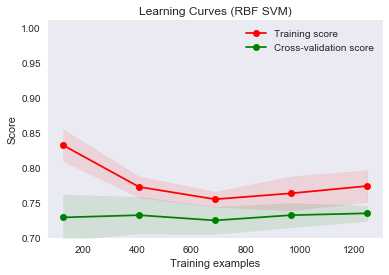

In [49]:
plot_learning_curve(clf_best, "Learning Curves (RBF SVM)", X_train_2, y_train_2, ylim=(0.7, 1.01))
plt.show()

# Random Forest Classifier

In [51]:
model_rfc = RandomForestClassifier().fit(X_train_2, y_train_2)


In [52]:
y_pred = model_rfc.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix looks like this: \n", cm)

             precision    recall  f1-score   support

          0       0.87      0.68      0.77       466
          1       0.43      0.70      0.53       159

avg / total       0.76      0.69      0.71       625

The Confusion Matrix looks like this: 
 [[318 148]
 [ 47 112]]


In [53]:
print("The Test Accuracy of the best Default Random Forest is",np.round(model_rfc.score(X_test,y_test)*100,2),"%")

The Test Accuracy of the best Default Random Forest is 68.8 %


In [54]:
rfc_model = model_selection(5, 15, X_train, y_train, X_test, y_test, scoring='auc')


Number of estimators: 5 - AUC: 0.72216
Number of estimators: 6 - AUC: 0.68387
Number of estimators: 7 - AUC: 0.71924
Number of estimators: 8 - AUC: 0.70810
Number of estimators: 9 - AUC: 0.72460
Number of estimators: 10 - AUC: 0.68809
Number of estimators: 11 - AUC: 0.72360
Number of estimators: 12 - AUC: 0.70281
Number of estimators: 13 - AUC: 0.73196
Number of estimators: 14 - AUC: 0.70695


Model evaluation
Accuracy: 0.83200
AUC: 0.73196

#### Classification Report ####

             precision    recall  f1-score   support

   Positive       0.85      0.94      0.89       466
   Negative       0.74      0.53      0.62       159

avg / total       0.82      0.83      0.82       625



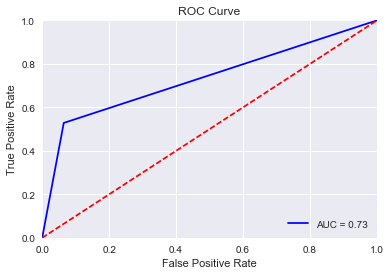

In [55]:
evaluate_model(rfc_model, X_test, y_test)

In [5]:
rfc_smote = model_selection(5, 15, X_train_resampled, y_train_resampled,
                     X_test_2, y_test_2, scoring='auc')

NameError: name 'model_selection' is not defined

In [4]:
sorted(rfc_smote.feature_importances_, reverse=True)[:5]

NameError: name 'rfc_smote' is not defined